#Definição das Colunas
- **Category: categoria na qual o artigo foi publicado.**
- **Headline: a manchete da notícia.**
- **Link: link para a notícia original.**
- **Short_description: Resumo do artigo de notícias.**
- **Keywords: algumas palavras chaves do artigo.**



#Importação dos Dados e das Bibliotecas

In [ ]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from nltk import tokenize
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
dados = pd.read_csv('NewsCategorizer.csv')
dados

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods
...,...,...,...,...,...
49995,SPORTS,This Baseball Team Learned There's A Wrong Way...,https://www.huffingtonpost.com/entry/san-jose-...,Many fans were pissed after seeing the minor l...,san-jose-giants-japanese-heritage-night
49996,SPORTS,Some Young Spurs Fan Dabbed 38 Times In A Sing...,https://www.huffingtonpost.com/entry/dab-kid-s...,"Never change, young man. Never change.",dab-kid-san-antonio-spurs
49997,SPORTS,Rasheed Wallace Ejected From Knicks-Suns Game ...,https://www.huffingtonpost.com/entry/rasheed-w...,Wallace was hit with a first technical for a h...,rasheed-wallace-ejected-knicks-suns-ball-dont-lie
49998,SPORTS,Why Jake Plummer And Other NFL Players Are Pus...,https://www.huffingtonpost.comhttp://extras.de...,They believe CBD could be an alternative to po...,NaN


#Informações dos Dados

In [ ]:
dados.shape

(50000, 5)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [ ]:
dados.isna().sum()

category                0
headline                0
links                   0
short_description       0
keywords             2668
dtype: int64

In [ ]:
dados.category.value_counts()

WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: category, dtype: int64

#Limpeza e Tratamento dos Dados

In [ ]:
novos_dados = dados.copy()

In [ ]:
novos_dados.drop('keywords',axis=1,inplace=True)

In [ ]:
classificacao = novos_dados['category'].replace(['WELLNESS','POLITICS','ENTERTAINMENT','TRAVEL','STYLE & BEAUTY',
                                                 'PARENTING','FOOD & DRINK','WORLD NEWS','BUSINESS','SPORTS'],
                                                  [0,1,2,3,4,5,6,7,8,9])

In [ ]:
novos_dados['classification'] = classificacao
novos_dados

,category,headline,links,short_description,classification
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,0
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,0
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,0
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",0
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",0
...,...,...,...,...,...
49995,SPORTS,This Baseball Team Learned There's A Wrong Way...,https://www.huffingtonpost.com/entry/san-jose-...,Many fans were pissed after seeing the minor l...,9
49996,SPORTS,Some Young Spurs Fan Dabbed 38 Times In A Sing...,https://www.huffingtonpost.com/entry/dab-kid-s...,"Never change, young man. Never change.",9
49997,SPORTS,Rasheed Wallace Ejected From Knicks-Suns Game ...,https://www.huffingtonpost.com/entry/rasheed-w...,Wallace was hit with a first technical for a h...,9
49998,SPORTS,Why Jake Plummer And Other NFL Players Are Pus...,https://www.huffingtonpost.comhttp://extras.de...,They believe CBD could be an alternative to po...,9


In [ ]:
vetor = CountVectorizer(max_features=60)
bagwords = vetor.fit_transform(novos_dados.headline)

In [ ]:
vetores = vetor.get_feature_names()
vetores[500:520]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abolition',
 'aboriginal',
 'aborted',
 'abortion',
 'abortions',
 'abound',
 'about',
 'aboutaleb',
 'aboutreika',
 'above',
 'abraham',
 'abrams',
 'abrathatfits',
 'abraxane',
 'abridged',
 'abroad',
 'abruptly',
 'abruzzo',
 'abs',
 'absence']

In [ ]:
bagwords.shape

(50000, 30101)

In [ ]:
type(bagwords)

scipy.sparse.csr.csr_matrix

In [ ]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bagwords,columns=vetores)
matriz_esparsa

,00,000,000th,001,007,00s,012,02,0445,08,...,zylka,zymurgy,zynga,zyola,zzz,zzzs,ça,élysées,émilion,étienne
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
todas_palavras = ('').join(novos_dados.headline)

In [ ]:
tokenizacao = tokenize.WhitespaceTokenizer()
espaco_token = tokenizacao.tokenize(todas_palavras)
freq = nltk.FreqDist(espaco_token)

In [ ]:
freq

FreqDist({'The': 8433, 'To': 8119, 'In': 5851, 'Of': 5051, 'A': 4727, 'For': 4084, 'the': 3932, 'And': 3612, 'to': 3573, 'Is': 3437, ...})

In [ ]:
palavras_irrelevantes = stopwords.words('english')
palavras_irrelevantes[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
frase_processada = []
nova_frase = []

for palavra in espaco_token:
  if palavra not in palavras_irrelevantes:
    nova_frase.append(palavra)
      
  frase_processada.append(' '.join(nova_frase))

In [ ]:
token_pontuacao = tokenize.WordPunctTokenizer()
pontos = []
nova_frase = []
frases_tratadas = []

for ponto in punctuation:
  pontos.append(ponto)
pontuacao = pontos + palavras_irrelevantes

for pts in frase_processada:
  palavra_texto = token_pontuacao.tokenize(pts)
  
  for out in palavra_texto:
      if out not in pontuacao:
        nova_frase.append(out)
  
  frases_tratadas.append(' '.join(nova_frase))

In [ ]:
tfidf = TfidfVectorizer(max_features=50)
tfidf_palavras_peso = tfidf.fit_transform(frases_tratadas)

novos_dados['New_Headline'] = tfidf_palavras_peso

In [ ]:
nuvem_palavras = WordCloud(width=900,
                           height=600,
                           max_font_size=100).generate(todas_palavras)

nuvem_palavras_tratadas = WordCloud(width=900,
                                    height=600,
                                    max_font_size=100).generate(frases_tratadas)

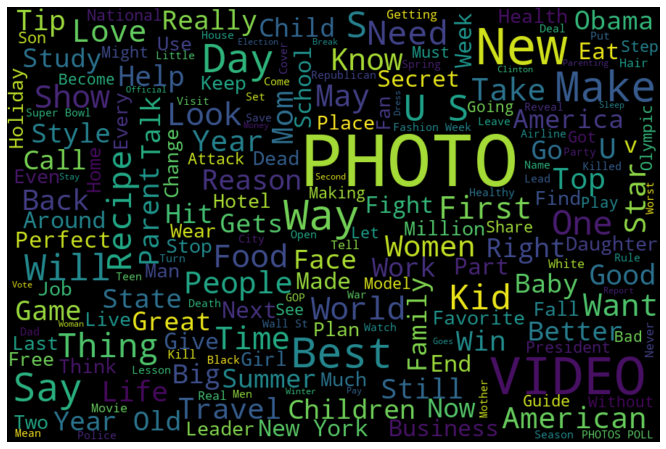

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(nuvem_palavras,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(nuvem_palavras_tratadas,interpolation='bilinear')
plt.axis('off')
plt.show()

#Classificação e Avaliação 

In [ ]:
treino,teste,classe_treino,classe_teste = train_test_split(bagwords,
                                                           novos_dados.classification,
                                                           random_state=42
                                                           )

In [ ]:
Rl = LogisticRegression()
Rl.fit(treino,classe_treino)

In [ ]:
acuracia = Rl.score(teste,classe_teste)
acuracia